In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
col_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [8]:
#to normalize the columns
diabetes[col_to_norm] = diabetes[col_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
import tensorflow as tf

In [12]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [13]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
glu_conc = tf.feature_column.numeric_column('Glucose_concentration')
blood_pr = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedig = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [14]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [15]:
#Another way if you don't know all the names of the possible groups present
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

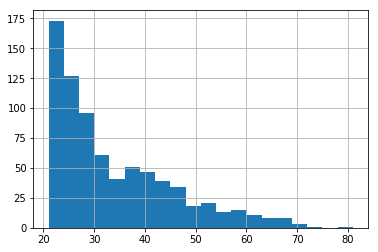

In [19]:
diabetes['Age'].hist(bins=20)

In [21]:
#converting a continious numeric in a categorical feature
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [23]:
feat_cols = [num_preg, glu_conc, blood_pr, tricep, insulin, bmi, pedig, age_bucket, assigned_group]

In [24]:
x_data = diabetes.drop('Class', axis = 1)

In [25]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [26]:
labels = diabetes['Class']

In [27]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [28]:
import sklearn

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_eval, y_train, y_eval = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [35]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [32]:
model = tf.estimator.LinearClassifier(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sony\\AppData\\Local\\Temp\\tmpdar_chm3', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [36]:
model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\sony\AppData\Local\Temp\tmpdar_chm3\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 215.119
INFO:tensorflow:loss = 5.0646896, step = 101 (0.473 sec)
INFO:tensorflow:global_step/sec: 216.805
INFO:tensorflow:loss = 5.0693035, step = 201 (0.454 sec)
INFO:tensorflow:global_step/sec: 237.927
INFO:tensorflow:loss = 4.551276, step = 301 (0.422 sec)
INFO:tensorflow:global_step/sec: 260.923
INFO:tensorflow:loss = 3.6950622, step = 401 (0.383 sec)
INFO:tensorflow:global_step/sec: 244.016
INFO:tensorflow:loss = 5.4069023, step = 501 (0.413 sec)
INFO:tensorflow:global_step/sec: 237.845
INFO:tensorflow:loss = 5.816324, step = 601 (0.419 sec)
INFO:tensorflow:global_step/sec: 265.054
INFO:tensorflow:loss = 5.790655, step = 701 (0.375 sec)
INFO:tensorflow:global_step/sec: 260.245
INFO:tensorflow:loss = 4.3493366, step = 801 (0.386 sec)
INFO:tensorflow:global_step/se

In [38]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_eval, y=y_eval, batch_size=10, num_epochs=1, shuffle=False)

In [40]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-26-19:20:00
INFO:tensorflow:Restoring parameters from C:\Users\sony\AppData\Local\Temp\tmpdar_chm3\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-26-19:20:03
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.797819, auc_precision_recall = 0.6340318, average_loss = 0.5286121, global_step = 1000, label/mean = 0.35064936, loss = 5.087891, prediction/mean = 0.35050282


In [41]:
results

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.797819,
 'auc_precision_recall': 0.6340318,
 'average_loss': 0.5286121,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.087891,
 'prediction/mean': 0.35050282}

In [42]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_eval, batch_size=10, num_epochs=1, shuffle=False)

In [43]:
predictions = model.predict(pred_input_func)

In [45]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\sony\AppData\Local\Temp\tmpdar_chm3\model.ckpt-1000


In [46]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.50663894], dtype=float32),
  'logits': array([0.02655721], dtype=float32),
  'probabilities': array([0.49336112, 0.50663894], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6062191], dtype=float32),
  'logits': array([0.4314468], dtype=float32),
  'probabilities': array([0.39378092, 0.6062191 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.32985818], dtype=float32),
  'logits': array([-0.70882654], dtype=float32),
  'probabilities': array([0.6701418 , 0.32985818], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.33038655], dtype=float32),
  'logits': array([-0.70643723], dtype=float32),
  'probabilities': array([0.6696135 , 0.33038658], dtype=float32)},
 {'class

In [48]:
dnn_model = tf.estimator.DNNClassifier([10, 10, 10], feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sony\\AppData\\Local\\Temp\\tmpqovuo1fj', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [50]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension = 4)

In [57]:
feat_colss = [num_preg, glu_conc, blood_pr, tricep, insulin, bmi, pedig, age_bucket, embedded_group_col]

In [58]:
imput_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [61]:
dnn_model = tf.estimator.DNNClassifier([10, 10, 10], feature_columns = feat_colss, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sony\\AppData\\Local\\Temp\\tmpny_tft0a', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [62]:
dnn_model.train(input_fn = input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\sony\AppData\Local\Temp\tmpny_tft0a\model.ckpt.
INFO:tensorflow:loss = 7.197695, step = 1
INFO:tensorflow:global_step/sec: 208.412
INFO:tensorflow:loss = 5.4125414, step = 101 (0.465 sec)
INFO:tensorflow:global_step/sec: 175.933
INFO:tensorflow:loss = 7.8498297, step = 201 (0.567 sec)
INFO:tensorflow:global_step/sec: 251.406
INFO:tensorflow:loss = 4.740037, step = 301 (0.400 sec)
INFO:tensorflow:global_step/sec: 169.827
INFO:tensorflow:loss = 5.888289, step = 401 (0.603 sec)
INFO:tensorflow:global_step/sec: 246.751
INFO:tensorflow:loss = 4.6166267, step = 501 (0.387 sec)
INFO:tensorflow:global_step/sec: 235.971
INFO:tensorflow:loss = 4.0956836, step = 601 (0.431 sec)
INFO:tensorflow:global_step/sec: 261.082
INFO:tensorflow:loss = 4.302234, step = 701 (0.379 sec)
INFO:tensorflow:global_step/sec: 270.456
INFO:tensorflow:loss = 5.282182, step = 801 (0.373 sec)
INFO:tensorflow:global_step/sec

In [63]:
eval_input_func = t.estimator.inputs.pandas_input_fn(x=X_eval, y=y_eval, batch_size=10, num_epochs=1, shuffle=False)

In [64]:
dnn_model.evaluate(input_fn = eval_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-02-26-19:51:28
INFO:tensorflow:Restoring parameters from C:\Users\sony\AppData\Local\Temp\tmpny_tft0a\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/10

{'accuracy': 0.7532467,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8373661,
 'auc_precision_recall': 0.7359371,
 'average_loss': 0.47248232,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.547642,
 'prediction/mean': 0.3544459}